In [3]:
import os
import numpy as np
import pandas as pd
import itertools
import sklearn.preprocessing
import csv
import ntpath
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
df = pd.read_csv('train_core/features_core.csv',header = None)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-424.004655,85.886018,-19.391035,19.548873,-3.152061,-3.135796,-5.586479,2.204532,-0.968167,-4.146447,...,0.756196,0.754540,18.187436,14.309552,16.744301,16.287958,16.495040,18.176403,53.666413,down
1,-427.845940,61.444910,-69.906503,75.739853,-35.569725,9.582659,6.669224,5.555409,4.426516,9.670583,...,0.789944,0.717734,23.542518,16.525604,19.920645,17.190587,18.389313,21.918735,60.188674,down
2,-327.288344,107.655145,-85.208783,-4.627603,-34.472271,-2.624659,-18.956204,-6.853750,-7.975197,-20.111568,...,0.553500,0.663733,31.389790,14.436285,17.012344,18.676632,18.853558,19.082480,57.331269,down
3,-341.501762,107.211360,-90.836330,-0.098215,-33.703336,-3.610792,-29.906583,-9.599740,-18.541331,-23.105156,...,0.536866,0.596243,29.135632,14.979695,17.966184,17.527041,17.873409,20.326471,57.930192,down
4,-442.097720,142.172651,-25.851881,33.580954,-4.230062,12.438396,-16.501494,12.557016,0.892619,-2.308974,...,0.361471,0.472670,26.285881,19.839796,20.518118,19.795706,18.634939,17.751166,56.695714,down
5,-481.401211,96.320072,-3.340789,6.039630,-1.719361,16.746752,-0.383682,-8.960226,6.744356,-1.369229,...,0.626463,0.570527,20.251495,15.690428,17.070937,16.076208,22.293984,21.240883,51.277368,down


In [7]:
df = shuffle(df)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
52399,-380.221929,102.019631,-28.538222,17.987331,12.730368,-8.109310,1.565168,6.958159,-8.646110,-4.387628,...,0.537253,0.581346,20.102300,16.866132,18.203538,16.951411,16.884817,21.558209,48.519915,unknown
10913,-548.529842,132.459795,14.813949,37.412871,-11.907232,31.101038,-11.298237,-4.108669,-7.755124,-4.252361,...,0.743655,0.694928,17.670084,12.763416,17.195076,16.554869,16.417740,17.003353,57.458264,go
53746,-326.310246,82.067580,-49.568605,35.735243,-21.953670,-7.054635,-18.041920,-0.860607,-14.277948,-8.038085,...,0.617635,0.577191,17.969131,14.249908,16.580883,15.197002,15.988702,20.094849,56.152905,unknown
27357,-368.414488,141.956012,-5.342232,36.657024,11.315047,24.025124,-7.446640,-1.153863,-6.744223,-7.091765,...,0.551728,0.635722,19.599935,14.617484,18.819043,15.682366,17.405420,16.872141,54.063612,right
53535,-529.473882,59.512971,-52.720096,44.227968,0.770054,6.369366,2.799435,-22.690166,-6.945179,-9.673592,...,0.613184,0.604854,21.482498,13.974919,18.347290,19.641457,19.925901,24.263881,44.326867,unknown
44449,-231.333538,153.703104,-62.825395,44.638448,-32.266823,25.550558,-21.282112,12.010370,-1.904112,1.992131,...,0.866309,0.777941,23.779478,13.326946,15.849323,14.898065,18.136205,17.025298,62.755271,unknown


# Partitioning Data

In [8]:
tr = 61000

features = np.array(df)
tr_x = features[:tr,0:59]
tr_y = features[:tr,59]
val_x = features[tr:,0:59]
val_y = features[tr:,59]

# Preprocessing

In [9]:
tr_mean = np.mean(tr_x, axis=0)
tr_std = np.std(tr_x, axis = 0,dtype=np.float32)
tr_xp = (tr_x - tr_mean[None,:])/tr_std[None,:]

val_mean = np.mean(val_x, axis=0)
val_std = np.std(val_x, axis = 0,dtype=np.float32)
val_xp = (val_x - val_mean[None,:])/val_std[None,:]

# Label Encoder
lab = LabelEncoder()
tr_yp= lab.fit_transform(tr_y)
val_yp= lab.fit_transform(val_y)

# One-Hot Coding
n_words= np.unique(tr_yp)
n_classes = len(n_words)
n_features = tr_xp.shape[1]

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(n_classes))
tr_yoh = label_binarizer.transform(tr_yp)
val_yoh = label_binarizer.transform(val_yp)

# Random Forest

In [16]:
rf_class = RandomForestClassifier(n_estimators=1000)
pred_yp_rf = rf_class.fit(tr_xp, tr_y).predict(val_xp)
accuracy_score(val_y, pred_yp_rf)

# kNN

In [10]:
knn_class = KNeighborsClassifier()
pred_yp_knn = knn_class.fit(tr_xp, tr_y).predict(val_xp)
# pred_yp_knn = knn_class.predict(val_xp)
accuracy_score(val_y, pred_yp_knn)

0.33786078098471989

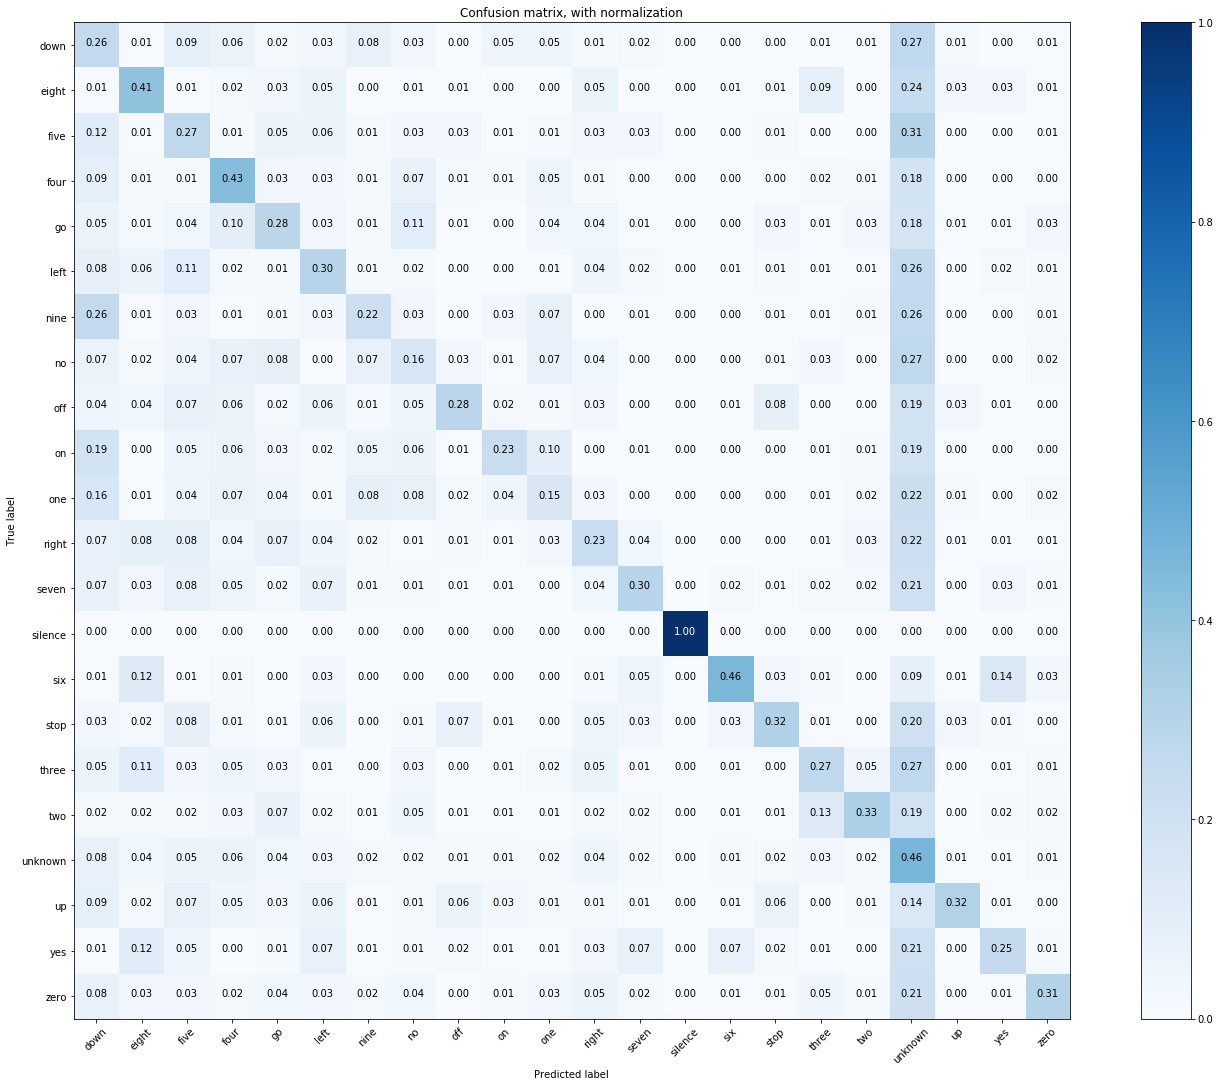

In [11]:
class_names = np.unique(tr_y)
cnf_matrix = confusion_matrix(val_y, pred_yp_knn)
np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))
plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names,title='Confusion matrix, with normalization')
plt.show()

In [35]:
csv_predicted = r'test/predicted.csv'
csv_test = r'sample_submission/sample_submission.csv'

In [11]:
df_test = pd.read_csv('test/features_test.csv')
df_test.head(6)
# df_test.shape

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,-338.511154,102.066710,-4.120895,44.694348,-8.756677,21.426348,-8.100844,10.468752,-3.868767,-3.559325,...,0.794399,0.775464,0.673272,16.731777,13.055074,17.163251,14.892364,16.392394,16.374787,60.968969
1,-535.631106,83.632364,-16.210444,34.133921,14.095130,1.835918,7.162974,12.504350,0.784239,7.275567,...,0.770306,0.742213,0.686465,18.163194,16.717341,15.554067,14.996465,15.707725,19.156684,53.804453
2,-413.966024,138.305580,5.987065,20.857039,-46.532399,10.602467,6.662322,-3.738522,-11.604819,2.684391,...,0.669348,0.604849,0.675655,20.253017,15.041317,18.467179,21.230156,21.180709,21.157533,57.844636
3,-443.474559,137.007666,-64.419557,66.847526,-41.027827,26.234735,-8.921399,-5.852228,11.445934,-20.062091,...,0.741117,0.772101,0.812103,15.504441,10.936783,13.178482,14.035638,15.057313,15.218129,57.469010
4,-370.304210,66.242920,-16.146051,37.255873,-9.583757,1.408579,-23.635343,-7.600453,-2.366957,-6.291928,...,0.624082,0.474024,0.533118,16.493523,17.037861,23.057447,21.886767,21.918772,19.781116,59.204809
5,-513.390532,99.965307,22.274840,54.592541,13.359532,12.503541,-27.477801,6.205036,17.716620,-25.775879,...,0.456625,0.493752,0.594417,21.257338,15.950175,19.563778,17.992970,23.346508,20.275910,54.096226


In [12]:
ts_x = np.array(df_test)
ts_mean = np.mean(ts_x, axis=0)
ts_std = np.std(ts_x, axis = 0,dtype=np.float32)
ts_xp = (ts_x - ts_mean[None,:])/ts_std[None,:]

In [13]:
pred_y = knn_class.predict(ts_xp)

In [39]:
pred_df = pd.read_csv(csv_test)
pred_df['label'] = pred_y
pred_df.to_csv(csv_predicted, index= None)

In [1]:
# pd.DataFrame(pred_df)